In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from astropy.io import fits 
from astropy.table import Table 
from matplotlib.colors import LogNorm 
from astropy.utils.data import download_file
import datetime
from datetime import datetime
from astropy.timeseries import LombScargle

In [2]:
event_RW3T= '/Users/kate/Desktop/Summer_work/kplr_anc-eng_TH1RW3T.fits' #reaction wheel housing temperatures (wheel 3, prob)
hdul=fits.open(event_RW3T, mmemmap=True)

In [3]:
table_hdu=hdul[1]
df=pd.DataFrame(table_hdu.data)
print(df.head())

            MJD                      UTC     LC   SC    TH1RW3T
0  54949.283051  2009-04-28T06:47:35.600  384.0  1.0  10.031017
1  54949.283120  2009-04-28T06:47:41.600  384.0  1.0  10.031017
2  54949.283722  2009-04-28T06:48:33.600  384.0  2.0  10.031017
3  54949.284394  2009-04-28T06:49:31.600  384.0  3.0  10.031017
4  54949.284486  2009-04-28T06:49:39.600  384.0  3.0  10.031017


In [4]:
df['UTC']=pd.to_datetime(df['UTC']) #to datetime so i can select for the times i want

In [5]:
print(df)

                  MJD                     UTC       LC         SC    TH1RW3T
0        54949.283051 2009-04-28 06:47:35.600    384.0        1.0  10.031017
1        54949.283120 2009-04-28 06:47:41.600    384.0        1.0  10.031017
2        54949.283722 2009-04-28 06:48:33.600    384.0        2.0  10.031017
3        54949.284394 2009-04-28 06:49:31.600    384.0        3.0  10.031017
4        54949.284486 2009-04-28 06:49:39.600    384.0        3.0  10.031017
...               ...                     ...      ...        ...        ...
2419510  56728.010050 2014-03-12 00:14:28.349  87433.0  2611475.0  27.366490
2419511  56728.010722 2014-03-12 00:15:26.349  87433.0  2611476.0  27.366490
2419512  56728.011393 2014-03-12 00:16:24.340  87433.0  2611477.0  27.366490
2419513  56728.012064 2014-03-12 00:17:22.340  87433.0  2611478.0  27.366490
2419514  56728.012735 2014-03-12 00:18:20.340  87433.0  2611479.0  27.366490

[2419515 rows x 5 columns]


In [6]:
df.info() #checking if it worked...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2419515 entries, 0 to 2419514
Data columns (total 5 columns):
 #   Column   Dtype         
---  ------   -----         
 0   MJD      float64       
 1   UTC      datetime64[ns]
 2   LC       float64       
 3   SC       float64       
 4   TH1RW3T  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 92.3 MB


In [7]:
may_2009 = df[df['UTC'].dt.month == 5]
may_2009 = may_2009[may_2009['UTC'].dt.year == 2009] #selecting all points in may 2009 with datetime

In [8]:
print(may_2009)

                MJD                     UTC      LC       SC    TH1RW3T
6235   54952.000458 2009-05-01 00:00:39.597   517.0   3991.0  10.743219
6236   54952.000643 2009-05-01 00:00:55.597   517.0   3991.0  10.743219
6237   54952.001315 2009-05-01 00:01:53.597   517.0   3992.0  10.743219
6238   54952.001778 2009-05-01 00:02:33.597   517.0   3993.0  10.743219
6239   54952.002449 2009-05-01 00:03:31.597   517.0   3994.0  10.743219
...             ...                     ...     ...      ...        ...
60771  54982.996869 2009-05-31 23:55:29.519  2034.0  49499.0   4.048895
60772  54982.997541 2009-05-31 23:56:27.519  2034.0  49500.0   4.048895
60773  54982.998212 2009-05-31 23:57:25.519  2034.0  49501.0   4.048895
60774  54982.998883 2009-05-31 23:58:23.519  2034.0  49502.0   4.048895
60775  54982.999555 2009-05-31 23:59:21.519  2034.0  49503.0   4.048895

[54541 rows x 5 columns]


In [9]:
may_2009.set_index('UTC', inplace=True) #not sure why but seems to be required for resample

In [10]:
may_2009_H = may_2009.resample('h').first().dropna() #hourly data

In [11]:
may_2009_H.reset_index(inplace=True) #required for resample again

In [12]:
print(may_2009_H)

                    UTC           MJD      LC       SC    TH1RW3T
0   2009-05-01 00:00:00  54952.000458   517.0   3991.0  10.743219
1   2009-05-01 01:00:00  54952.041870   519.0   4052.0  10.743219
2   2009-05-01 02:00:00  54952.083491   521.0   4113.0  10.743219
3   2009-05-01 03:00:00  54952.125111   523.0   4174.0  10.387006
4   2009-05-01 04:00:00  54952.166778   525.0   4235.0  10.387006
..                  ...           ...     ...      ...        ...
739 2009-05-31 19:00:00  54982.792124  2024.0  49198.0   5.789689
740 2009-05-31 20:00:00  54982.833744  2026.0  49260.0   4.395396
741 2009-05-31 21:00:00  54982.875365  2028.0  49321.0   5.439949
742 2009-05-31 22:00:00  54982.916985  2030.0  49382.0   6.843035
743 2009-05-31 23:00:00  54982.958606  2032.0  49443.0   5.090961

[744 rows x 5 columns]


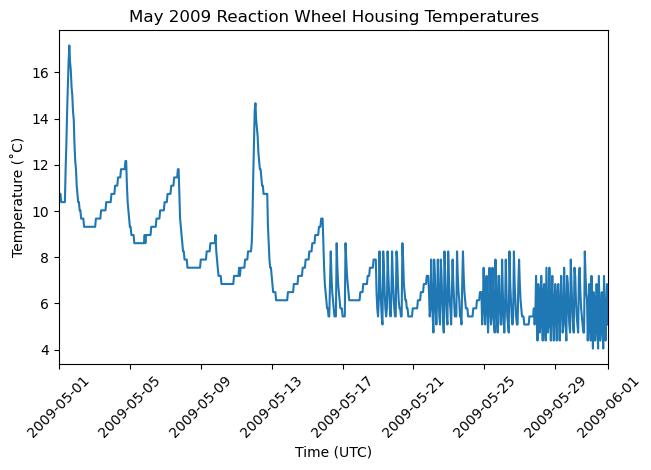

In [13]:
plt.plot(may_2009_H['UTC'], may_2009_H['TH1RW3T'])
plt.title('May 2009 Reaction Wheel Housing Temperatures')
plt.xlabel('Time (UTC)')
plt.ylabel('Temperature (˚C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlim(pd.to_datetime('2009-05-01'), pd.to_datetime('2009-06-01'))
plt.show() #horly data from may 2009

In [14]:
late_may_2009 = df[(df['UTC'].dt.month == 5) & (df['UTC'].dt.year == 2009) & (df['UTC'].dt.day >= 21)] #may 21-may 31

In [15]:
print(late_may_2009)

                MJD                     UTC      LC       SC   TH1RW3T
43237  54972.000110 2009-05-21 00:00:09.540  1496.0  33354.0  5.789689
43238  54972.000782 2009-05-21 00:01:07.540  1496.0  33355.0  5.789689
43239  54972.001152 2009-05-21 00:01:39.540  1496.0  33355.0  5.789689
43240  54972.001453 2009-05-21 00:02:05.540  1496.0  33356.0  5.789689
43241  54972.002124 2009-05-21 00:03:03.540  1496.0  33357.0  5.789689
...             ...                     ...     ...      ...       ...
60771  54982.996869 2009-05-31 23:55:29.519  2034.0  49499.0  4.048895
60772  54982.997541 2009-05-31 23:56:27.519  2034.0  49500.0  4.048895
60773  54982.998212 2009-05-31 23:57:25.519  2034.0  49501.0  4.048895
60774  54982.998883 2009-05-31 23:58:23.519  2034.0  49502.0  4.048895
60775  54982.999555 2009-05-31 23:59:21.519  2034.0  49503.0  4.048895

[17539 rows x 5 columns]


In [16]:
late_may_2009.set_index('UTC', inplace=True)

In [17]:
late_may_2009_H = late_may_2009.resample('15min').first().dropna() #data every 15min

In [18]:
late_may_2009_H.reset_index(inplace=True)

In [19]:
print(late_may_2009_H)

                     UTC           MJD      LC       SC   TH1RW3T
0    2009-05-21 00:00:00  54972.000110  1496.0  33354.0  5.789689
1    2009-05-21 00:15:00  54972.010712  1496.0  33369.0  5.789689
2    2009-05-21 00:30:00  54972.020921  1497.0  33384.0  5.789689
3    2009-05-21 00:45:00  54972.031661  1498.0  33400.0  5.789689
4    2009-05-21 01:00:00  54972.041731  1498.0  33415.0  5.789689
...                  ...           ...     ...      ...       ...
1051 2009-05-31 22:45:00  54982.948536  2032.0  49428.0  5.439949
1052 2009-05-31 23:00:00  54982.958606  2032.0  49443.0  5.090961
1053 2009-05-31 23:15:00  54982.969346  2033.0  49459.0  4.742764
1054 2009-05-31 23:30:00  54982.979416  2033.0  49473.0  4.742764
1055 2009-05-31 23:45:00  54982.990156  2034.0  49489.0  4.395396

[1056 rows x 5 columns]


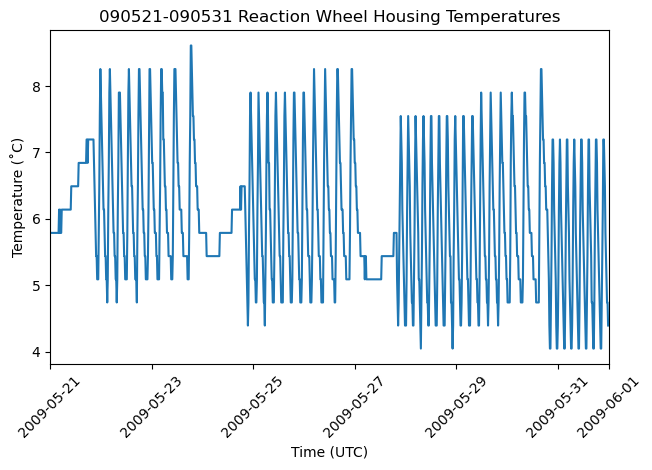

In [20]:
plt.plot(late_may_2009_H['UTC'], late_may_2009_H['TH1RW3T'])
plt.title('090521-090531 Reaction Wheel Housing Temperatures')
plt.xlabel('Time (UTC)')
plt.ylabel('Temperature (˚C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlim(pd.to_datetime('2009-05-21'), pd.to_datetime('2009-06-01'))
plt.show() #may 21-31 data every 15mins

In [21]:
latest_may_2009 = df[(df['UTC'].dt.month == 5) & (df['UTC'].dt.year == 2009) & (df['UTC'].dt.day >= 31)] #may 31 data

In [22]:
print(latest_may_2009)

                MJD                     UTC      LC       SC   TH1RW3T
59287  54982.000666 2009-05-31 00:00:57.521  1985.0  48036.0  4.395396
59288  54982.001337 2009-05-31 00:01:55.521  1985.0  48037.0  4.395396
59289  54982.002008 2009-05-31 00:02:53.513  1985.0  48038.0  4.395396
59290  54982.002680 2009-05-31 00:03:51.521  1985.0  48039.0  4.395396
59291  54982.003351 2009-05-31 00:04:49.521  1986.0  48040.0  4.395396
...             ...                     ...     ...      ...       ...
60771  54982.996869 2009-05-31 23:55:29.519  2034.0  49499.0  4.048895
60772  54982.997541 2009-05-31 23:56:27.519  2034.0  49500.0  4.048895
60773  54982.998212 2009-05-31 23:57:25.519  2034.0  49501.0  4.048895
60774  54982.998883 2009-05-31 23:58:23.519  2034.0  49502.0  4.048895
60775  54982.999555 2009-05-31 23:59:21.519  2034.0  49503.0  4.048895

[1489 rows x 5 columns]


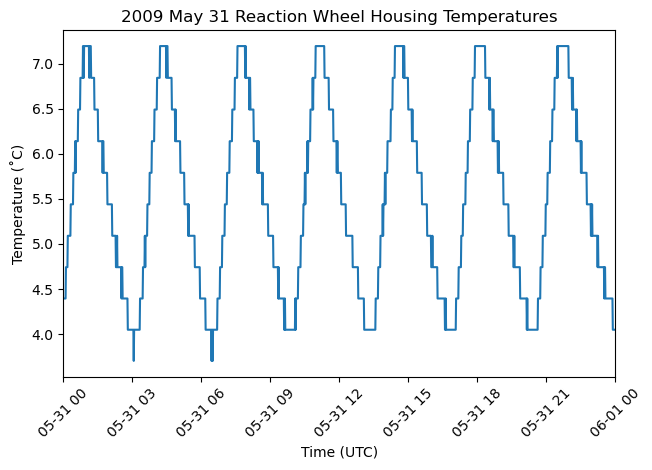

In [23]:
plt.plot(latest_may_2009['UTC'], latest_may_2009['TH1RW3T'])
plt.title('2009 May 31 Reaction Wheel Housing Temperatures')
plt.xlabel('Time (UTC)')
plt.ylabel('Temperature (˚C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlim(pd.to_datetime('2009-05-31'), pd.to_datetime('2009-06-01'))
plt.show() #may 31 all data points

In [24]:
last_may_2009 = df[(df['UTC'].dt.month == 5) & (df['UTC'].dt.year == 2009) & (df['UTC'].dt.day >= 31) & (df['UTC'].dt.hour>=20)]

In [25]:
print(last_may_2009)

                MJD                     UTC      LC       SC   TH1RW3T
60528  54982.833744 2009-05-31 20:00:35.519  2026.0  49260.0  4.395396
60529  54982.834416 2009-05-31 20:01:33.519  2026.0  49261.0  4.395396
60530  54982.835087 2009-05-31 20:02:31.519  2026.0  49261.0  4.395396
60531  54982.835758 2009-05-31 20:03:29.519  2026.0  49262.0  4.395396
60532  54982.836430 2009-05-31 20:04:27.519  2026.0  49263.0  4.395396
...             ...                     ...     ...      ...       ...
60771  54982.996869 2009-05-31 23:55:29.519  2034.0  49499.0  4.048895
60772  54982.997541 2009-05-31 23:56:27.519  2034.0  49500.0  4.048895
60773  54982.998212 2009-05-31 23:57:25.519  2034.0  49501.0  4.048895
60774  54982.998883 2009-05-31 23:58:23.519  2034.0  49502.0  4.048895
60775  54982.999555 2009-05-31 23:59:21.519  2034.0  49503.0  4.048895

[248 rows x 5 columns]


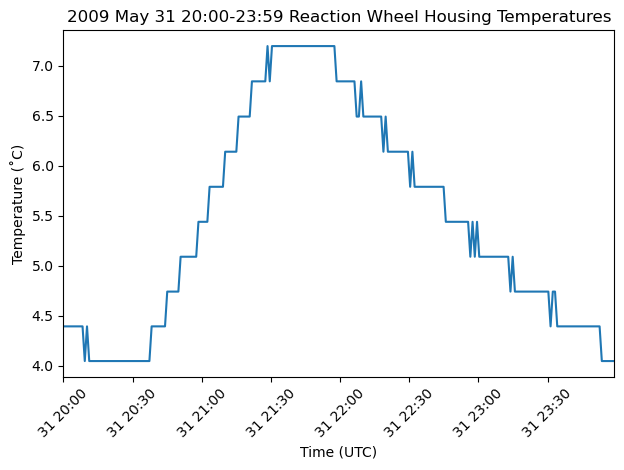

In [26]:
plt.plot(last_may_2009['UTC'], last_may_2009['TH1RW3T'])
plt.title('2009 May 31 20:00-23:59 Reaction Wheel Housing Temperatures')
plt.xlabel('Time (UTC)')
plt.ylabel('Temperature (˚C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlim(pd.to_datetime('2009-05-31 20:00'), pd.to_datetime('2009-05-31 23:59'))
plt.show() #8pm to 12am on may 31

In [27]:
full_2010 = df[df['UTC'].dt.year == 2010] #all 2010 (first full year)

In [28]:
print(full_2010)

                 MJD                     UTC       LC        SC    TH1RW3T
403024  55197.000229 2010-01-01 00:00:19.812  12507.0  363692.0  22.183410
403025  55197.000901 2010-01-01 00:01:17.812  12507.0  363693.0  22.183410
403026  55197.001572 2010-01-01 00:02:15.812  12507.0  363694.0  22.183410
403027  55197.002243 2010-01-01 00:03:13.812  12507.0  363695.0  22.183410
403028  55197.002914 2010-01-01 00:04:11.812  12507.0  363696.0  22.183410
...              ...                     ...      ...       ...        ...
962599  55561.996869 2010-12-31 23:55:29.518  30370.0  899570.0  23.271131
962600  55561.997541 2010-12-31 23:56:27.518  30370.0  899571.0  23.271131
962601  55561.998212 2010-12-31 23:57:25.518  30370.0  899572.0  22.907644
962602  55561.998883 2010-12-31 23:58:23.518  30370.0  899573.0  22.907644
962603  55561.999555 2010-12-31 23:59:21.518  30370.0  899574.0  23.271131

[559580 rows x 5 columns]


In [29]:
full_2010.set_index('UTC', inplace=True)
full_2010_6h = full_2010.resample('6h').first().dropna() #every 6 hours
print(full_2010_6h)

                              MJD       LC        SC    TH1RW3T
UTC                                                            
2010-01-01 00:00:00  55197.000229  12507.0  363692.0  22.183410
2010-01-01 06:00:00  55197.250623  12520.0  364060.0  22.183410
2010-01-01 12:00:00  55197.500345  12532.0  364427.0  22.183410
2010-01-01 18:00:00  55197.750067  12544.0  364793.0  22.183410
2010-01-02 00:00:00  55198.000461  12556.0  365161.0  21.822474
...                           ...      ...       ...        ...
2010-12-30 18:00:00  55560.750388  30309.0  897740.0  24.001370
2010-12-31 00:00:00  55561.000666  30321.0  898107.0  23.271131
2010-12-31 06:00:00  55561.250388  30333.0  898474.0  22.907644
2010-12-31 12:00:00  55561.500110  30346.0  898840.0  22.907644
2010-12-31 18:00:00  55561.750504  30358.0  899208.0  22.907644

[1460 rows x 4 columns]


In [30]:
full_2010_6h.reset_index(inplace=True) #again not sure what this does. changes amount of columns and position of UTC on screen?
print(full_2010_6h)

                     UTC           MJD       LC        SC    TH1RW3T
0    2010-01-01 00:00:00  55197.000229  12507.0  363692.0  22.183410
1    2010-01-01 06:00:00  55197.250623  12520.0  364060.0  22.183410
2    2010-01-01 12:00:00  55197.500345  12532.0  364427.0  22.183410
3    2010-01-01 18:00:00  55197.750067  12544.0  364793.0  22.183410
4    2010-01-02 00:00:00  55198.000461  12556.0  365161.0  21.822474
...                  ...           ...      ...       ...        ...
1455 2010-12-30 18:00:00  55560.750388  30309.0  897740.0  24.001370
1456 2010-12-31 00:00:00  55561.000666  30321.0  898107.0  23.271131
1457 2010-12-31 06:00:00  55561.250388  30333.0  898474.0  22.907644
1458 2010-12-31 12:00:00  55561.500110  30346.0  898840.0  22.907644
1459 2010-12-31 18:00:00  55561.750504  30358.0  899208.0  22.907644

[1460 rows x 5 columns]


In [31]:
print(full_2010_6h.columns) #checking things

Index(['UTC', 'MJD', 'LC', 'SC', 'TH1RW3T'], dtype='object')


In [32]:
print(last_may_2009.columns) #checking things

Index(['MJD', 'UTC', 'LC', 'SC', 'TH1RW3T'], dtype='object')


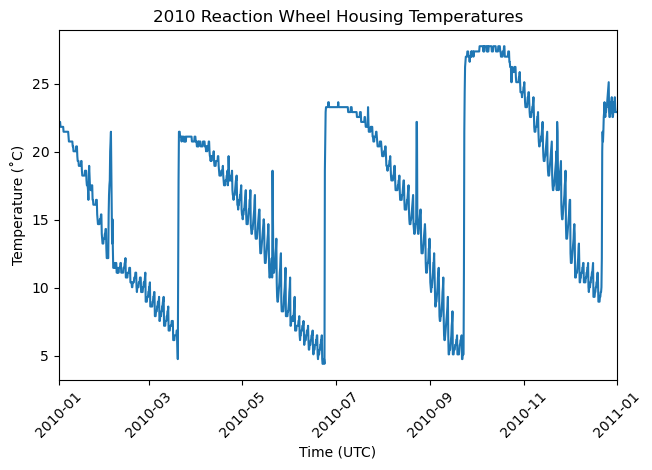

In [33]:
plt.plot(full_2010_6h['UTC'], full_2010_6h['TH1RW3T'])
plt.title('2010 Reaction Wheel Housing Temperatures')
plt.xlabel('Time (UTC)')
plt.ylabel('Temperature (˚C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlim(pd.to_datetime('2010-01-01'), pd.to_datetime('2011-01-01'))
plt.show() #all 2010 data every 6 hours

In [34]:
time = full_2010['MJD']*86400 #convert to seconds. sorry i am sure there is a better way. 
y = full_2010['TH1RW3T']
#i use variables time and y for every periodogram

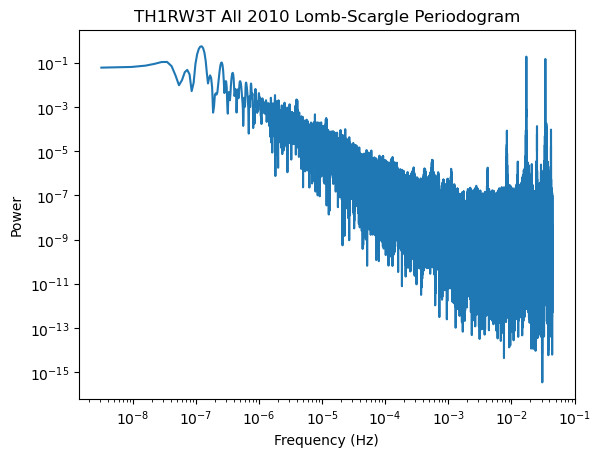

In [35]:
frequency, power = LombScargle(time, y).autopower()
plt.plot(frequency, power)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('TH1RW3T All 2010 Lomb-Scargle Periodogram')
plt.show()

In [36]:
full_2010.head()

,MJD,LC,SC,TH1RW3T
UTC,,,,
2010-01-01 00:00:19.812,55197.000229,12507.0,363692.0,22.18341
2010-01-01 00:01:17.812,55197.000901,12507.0,363693.0,22.18341
2010-01-01 00:02:15.812,55197.001572,12507.0,363694.0,22.18341
2010-01-01 00:03:13.812,55197.002243,12507.0,363695.0,22.18341
2010-01-01 00:04:11.812,55197.002914,12507.0,363696.0,22.18341


In [37]:
event_RW4T= '/Users/kate/Desktop/Summer_work/kplr_anc-eng_TH1RW4T.fits'
hdul2=fits.open(event_RW4T, mmemmap=True)
table_hdu2=hdul2[1]
df2=pd.DataFrame(table_hdu2.data)
print(df2.head()) #all '2' stuff is for TH1RW4T

            MJD                      UTC     LC   SC   TH1RW4T
0  54949.283051  2009-04-28T06:47:35.600  384.0  1.0  7.548307
1  54949.283120  2009-04-28T06:47:41.600  384.0  1.0  7.548307
2  54949.283722  2009-04-28T06:48:33.600  384.0  2.0  7.548307
3  54949.284394  2009-04-28T06:49:31.600  384.0  3.0  7.548307
4  54949.284486  2009-04-28T06:49:39.600  384.0  3.0  7.548307


In [38]:
df2['UTC']=pd.to_datetime(df2['UTC'])
full_2010_2 = df2[df2['UTC'].dt.year == 2010]

In [39]:
full_2010_2

,MJD,UTC,LC,SC,TH1RW4T
403024,55197.000229,2010-01-01 00:00:19.812,12507.0,363692.0,17.524428
403025,55197.000901,2010-01-01 00:01:17.812,12507.0,363693.0,17.524428
403026,55197.001572,2010-01-01 00:02:15.812,12507.0,363694.0,17.524428
403027,55197.002243,2010-01-01 00:03:13.812,12507.0,363695.0,17.524428
403028,55197.002914,2010-01-01 00:04:11.812,12507.0,363696.0,17.524428
...,...,...,...,...,...
962599,55561.996869,2010-12-31 23:55:29.518,30370.0,899570.0,20.743373
962600,55561.997541,2010-12-31 23:56:27.518,30370.0,899571.0,20.743373
962601,55561.998212,2010-12-31 23:57:25.518,30370.0,899572.0,20.743373
962602,55561.998883,2010-12-31 23:58:23.518,30370.0,899573.0,20.743373


In [40]:
np.correlate(full_2010['TH1RW3T'], full_2010_2['TH1RW4T'], mode='full') #full correlation between 2010 all data points

array([ 460.15873973,  920.31747946, 1380.47621919, ..., 1210.69993737,
        809.25659682,  407.81325628])

In [41]:
full_2010['TH1RW3T'].corr(full_2010_2['TH1RW4T']) #.corr is not working

nan

In [42]:
np.correlate(full_2010['TH1RW3T'], full_2010_2['TH1RW4T']) #valid method gives correlation at 0 lag

array([1.56084906e+08])

In [43]:
full_2010['TH1RW3T'].corr(full_2010_2['TH1RW4T'], method='kendall') #no method working

nan

In [44]:
full_2010['TH1RW3T'].corr(full_2010_2['TH1RW4T'], method='spearman')

nan

In [45]:
print(df['TH1RW3T'].isna().any()) #trying to find out why it is not working. 2 reasons could be NaNs or one list has std dev of 0.
                                    #they do not but i thought i'd check anyway. 

False


In [46]:
print(df2['TH1RW4T'].isna().any())

False


In [47]:
print(np.std(df['TH1RW3T']))

8.089726388740134


In [48]:
print(np.std(df2['TH1RW4T']))

8.46147481245898


In [49]:
print(np.argmax(np.correlate(full_2010['TH1RW3T'], full_2010_2['TH1RW4T'])))

0


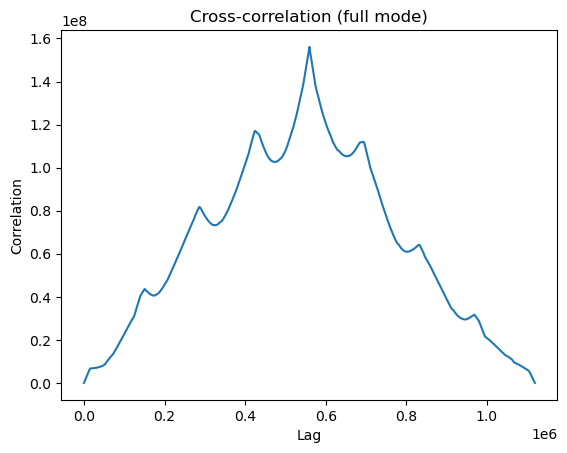

In [50]:
plt.plot(np.correlate(full_2010['TH1RW3T'], full_2010_2['TH1RW4T'], mode='full'))
plt.title("Cross-correlation (full mode)")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show() #first correlation plot!

In [51]:
correlation_matrix = np.corrcoef(full_2010['TH1RW3T'], full_2010_2['TH1RW4T'])
pearson_correlation = correlation_matrix[0, 1]
print(pearson_correlation) #either got this from the internet or chatgpt... did not use because i want full correlation

0.9474753552955109


In [52]:
df.set_index('UTC', inplace=True)
rw3t = df.resample('15min').first().dropna() #there is more info in my slides about how resample works.
                                            #i don't think it really matters which one version i use...

In [53]:
rw3t

,MJD,LC,SC,TH1RW3T
UTC,,,,
2009-04-28 06:45:00,54949.283051,384.0,1.0,10.031017
2009-04-28 07:00:00,54949.291778,385.0,14.0,10.031017
2009-04-28 07:15:00,54949.302241,385.0,30.0,10.031017
2009-04-28 07:30:00,54949.312588,386.0,45.0,10.031017
2009-04-28 07:45:00,54949.323329,386.0,61.0,10.031017
...,...,...,...,...
2014-03-11 23:15:00,56727.969101,87431.0,2611415.0,26.226986
2014-03-11 23:30:00,56727.979171,87432.0,2611430.0,26.604473
2014-03-11 23:45:00,56727.989911,87432.0,2611446.0,26.604473


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2419515 entries, 0 to 2419514
Data columns (total 5 columns):
 #   Column   Dtype         
---  ------   -----         
 0   MJD      float64       
 1   UTC      datetime64[ns]
 2   LC       float64       
 3   SC       float64       
 4   TH1RW4T  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 92.3 MB


In [55]:
df2.set_index('UTC', inplace=True)
rw4t = df2.resample('15min').first().dropna() #resamplng TH1RW4T for every 15 mins also
rw4t

,MJD,LC,SC,TH1RW4T
UTC,,,,
2009-04-28 06:45:00,54949.283051,384.0,1.0,7.548307
2009-04-28 07:00:00,54949.291778,385.0,14.0,7.548307
2009-04-28 07:15:00,54949.302241,385.0,30.0,7.548307
2009-04-28 07:30:00,54949.312588,386.0,45.0,7.548307
2009-04-28 07:45:00,54949.323329,386.0,61.0,7.548307
...,...,...,...,...
2014-03-11 23:15:00,56727.969101,87431.0,2611415.0,20.384659
2014-03-11 23:30:00,56727.979171,87432.0,2611430.0,20.384659
2014-03-11 23:45:00,56727.989911,87432.0,2611446.0,20.384659


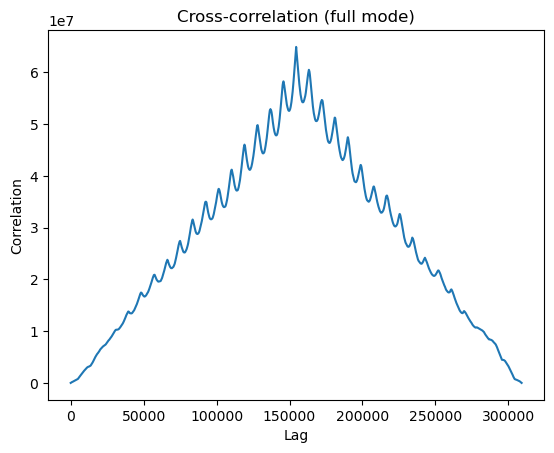

In [56]:
plt.plot(np.correlate(rw3t['TH1RW3T'], rw4t['TH1RW4T'], mode='full'))
plt.title("Cross-correlation (full mode)")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show() #now using data sampled the way i want it to be (5 years every 15 mins)

In [57]:
a = (rw3t['TH1RW3T'] - np.mean(rw3t['TH1RW3T'])) / (np.std(rw3t['TH1RW3T']) * len(rw3t['TH1RW3T']))
b = (rw4t['TH1RW4T'] - np.mean(rw4t['TH1RW4T'])) / (np.std(rw4t['TH1RW4T']))
full_corr = np.correlate(a, b, 'full')
max_index = np.argmax(full_corr)
zero_lag_index = len(rw3t['TH1RW3T']) - 1
time_step =1
time_delay = (max_index - zero_lag_index) * time_step
lags = np.arange(-zero_lag_index, zero_lag_index + 1) * time_step
#normalizing data. source on slides and chatgpt

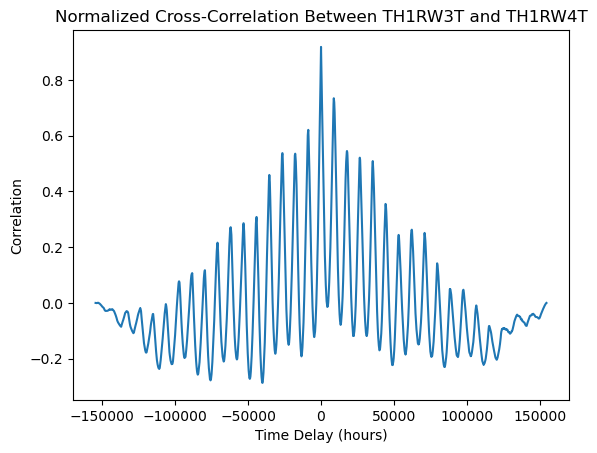

In [58]:
plt.plot(lags, full_corr)
plt.title("Normalized Cross-Correlation Between TH1RW3T and TH1RW4T")
plt.xlabel("Time Delay (hours)")
plt.ylabel("Correlation")
plt.show() #yay!

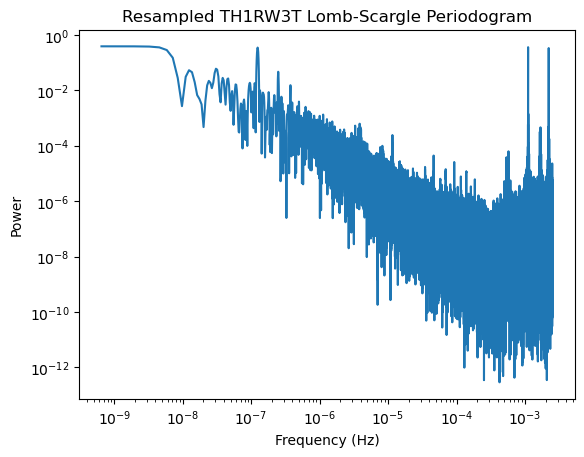

In [59]:
time = rw3t['MJD']*86400
y = rw3t['TH1RW3T']
frequency, power = LombScargle(time, y).autopower()
plt.plot(frequency, power)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Resampled TH1RW3T Lomb-Scargle Periodogram')
plt.show() #lomb-scargle now that u have data sampled the way i want. also did one for the whole dataset which i have a pic of
            #but it is not here bc it took like 6 hours to make

In [60]:
event_pointing= '/Users/kate/Desktop/Summer_work/kplr_anc-eng_AttitudeErrors.fits'
hdul3=fits.open(event_pointing, mmemmap=True)
table_hdu3=hdul3[1]
df3=pd.DataFrame(table_hdu3.data)
print(df3.head()) #'3' stuff refers to pointing errors

            MJD                      UTC     LC      SC  ADATTERRMX  \
0  54952.905504  2009-05-01T21:43:55.540  562.0  5320.0         0.0   
1  54952.905967  2009-05-01T21:44:35.540  562.0  5320.0         0.0   
2  54952.906430  2009-05-01T21:45:15.540  562.0  5321.0         0.0   
3  54952.906893  2009-05-01T21:45:55.540  562.0  5322.0         0.0   
4  54952.907356  2009-05-01T21:46:35.540  562.0  5322.0         0.0   

   ADATTERRMY  ADATTERRMZ  ADATTERRDX  ADATTERRDY  ADATTERRDZ  
0         0.0         0.0         0.0         0.0         0.0  
1         0.0         0.0         0.0         0.0         0.0  
2         0.0         0.0         0.0         0.0         0.0  
3         0.0         0.0         0.0         0.0         0.0  
4         0.0         0.0         0.0         0.0         0.0  


In [61]:
df3['UTC']=pd.to_datetime(df3['UTC'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955458 entries, 0 to 2955457
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   MJD         float64       
 1   UTC         datetime64[ns]
 2   LC          float64       
 3   SC          float64       
 4   ADATTERRMX  float64       
 5   ADATTERRMY  float64       
 6   ADATTERRMZ  float64       
 7   ADATTERRDX  float64       
 8   ADATTERRDY  float64       
 9   ADATTERRDZ  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 225.5 MB


In [62]:
df3.set_index('UTC', inplace=True)
att_err = df3.resample('15min').first().dropna()
att_err

,MJD,LC,SC,ADATTERRMX,ADATTERRMY,ADATTERRMZ,ADATTERRDX,ADATTERRDY,ADATTERRDZ
UTC,,,,,,,,,
2009-05-01 21:30:00,54952.905504,562.0,5320.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-05-01 21:45:00,54952.906430,562.0,5321.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-05-01 22:00:00,54952.917078,562.0,5337.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-05-01 22:15:00,54952.927263,563.0,5352.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-05-01 22:30:00,54952.937911,563.0,5367.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2013-05-12 03:45:00,56424.156425,72563.0,2165367.0,0.000007,0.000002,-0.000003,0.000009,0.000002,0.000004
2013-05-12 04:00:00,56424.167073,72564.0,2165382.0,0.000007,0.000002,-0.000003,0.000009,0.000002,0.000004
2013-05-12 04:15:00,56424.177258,72564.0,2165397.0,0.000007,0.000002,-0.000003,0.000009,0.000002,0.000004


In [63]:
a = (rw3t['TH1RW3T'] - np.mean(rw3t['TH1RW3T'])) / (np.std(rw3t['TH1RW3T']) * len(rw3t['TH1RW3T']))
b = (att_err['ADATTERRMX'] - np.mean(att_err['ADATTERRMX'])) / (np.std(att_err['ADATTERRMX'])) #mean pointing errors in x direction
full_corr = np.correlate(a, b, 'full')
max_index = np.argmax(full_corr)
zero_lag_index = len(rw3t['TH1RW3T']) - 1
time_step =1
time_delay = (max_index - zero_lag_index) * time_step
lags = np.arange(-zero_lag_index, zero_lag_index + 1) * time_step #copy from above

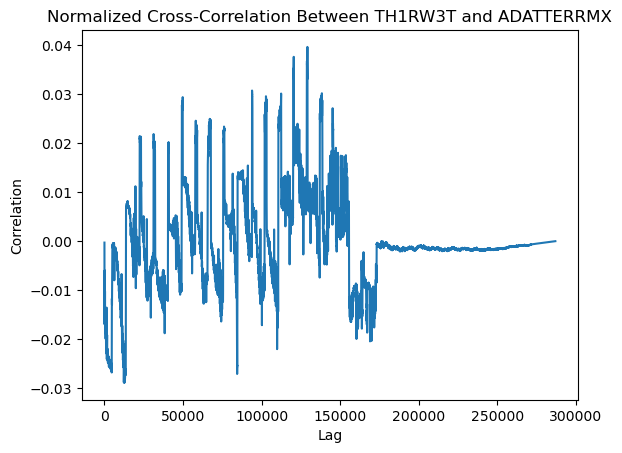

In [64]:
plt.plot(full_corr)
plt.title("Normalized Cross-Correlation Between TH1RW3T and ADATTERRMX")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show() #correlation that we did not expect to be high! and it is not!